# Yash Meshram
# The Spark Foundation
# Data Science & Business Analytics

# Task
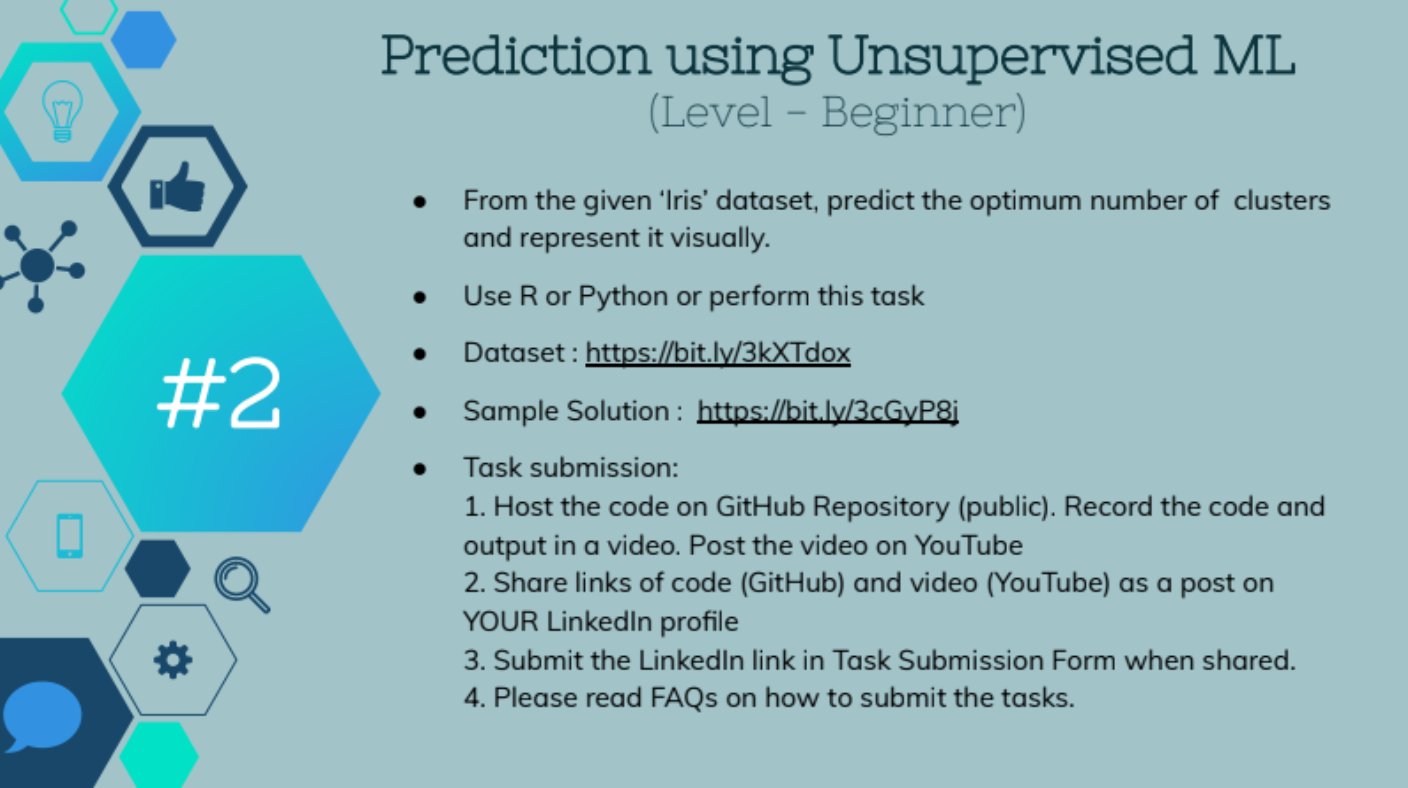

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df = df.drop(['Id'], axis='columns')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


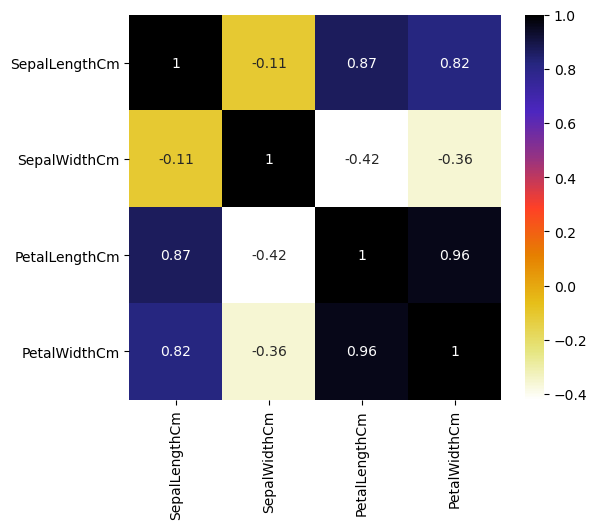

In [5]:
plt.figure(figsize=(6,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
sns.ti

In [6]:
def correlation(data, threshold):
    corr_col = []
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                corr_col.append(corr.columns[i])
    return corr_col

In [7]:
correlation(df, 0.85)

['PetalLengthCm', 'PetalWidthCm']

In [8]:
for i in correlation(df, 0.85):
    df = df.drop([i], axis='columns')
df

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


Text(0.5, 1.0, 'The Elbow Method')

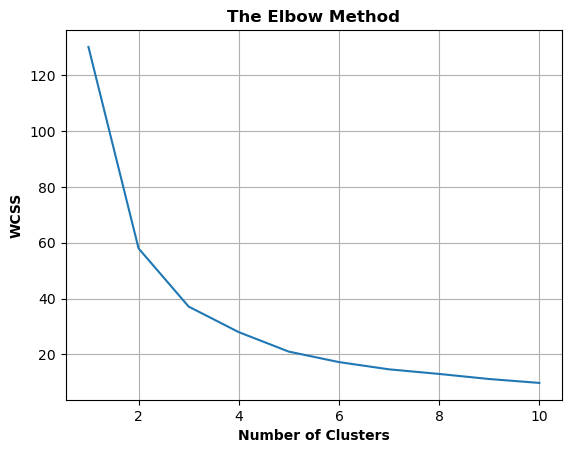

In [9]:
x = df.drop(['Species'], axis='columns')
Range = range(1,11)
WCSS = []
for i in Range:
    model = KMeans(n_clusters=i, random_state = 2)
    model.fit(x)
    WCSS.append(model.inertia_)

plt.plot(Range, WCSS)
plt.grid(True)
plt.xlabel('Number of Clusters', fontweight = 'bold')
plt.ylabel('WCSS', fontweight = 'bold')
plt.title('The Elbow Method', fontweight = 'bold')

# From the above graph we can conclude that number of cluster is 3

In [10]:
model = KMeans(n_clusters=3, random_state = 0)

In [11]:
predicted_value = model.fit_predict(df.drop(['Species'], axis='columns'))
predicted_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [12]:
df['Cluster'] = predicted_value
df

,SepalLengthCm,SepalWidthCm,Species,Cluster
0,5.1,3.5,Iris-setosa,0
1,4.9,3.0,Iris-setosa,0
2,4.7,3.2,Iris-setosa,0
3,4.6,3.1,Iris-setosa,0
4,5.0,3.6,Iris-setosa,0
...,...,...,...,...
145,6.7,3.0,Iris-virginica,1
146,6.3,2.5,Iris-virginica,2
147,6.5,3.0,Iris-virginica,1
148,6.2,3.4,Iris-virginica,1


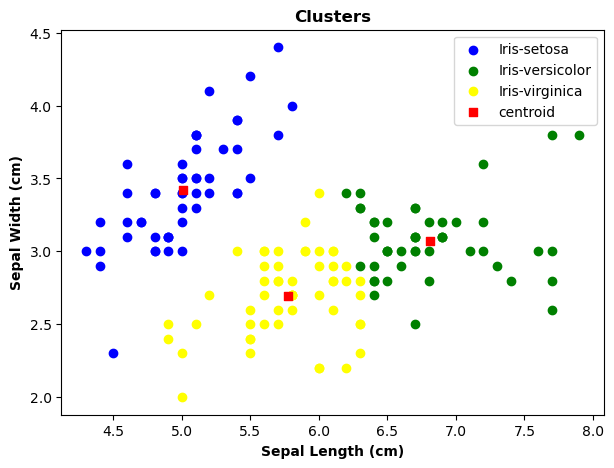

In [13]:
plt.figure(figsize=(7,5))

df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

plt.scatter(df0.SepalLengthCm, df0.SepalWidthCm, color = 'blue', label = 'Iris-setosa')
plt.scatter(df1.SepalLengthCm, df1.SepalWidthCm, color = 'green', label = 'Iris-versicolor')
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm, color = 'yellow', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red', marker='s', label='centroid')
plt.xlabel('Sepal Length (cm)', fontweight = 'bold')
plt.ylabel('Sepal Width (cm)', fontweight = 'bold')
plt.title('Clusters', fontweight = 'bold')
plt.legend()